In [1]:
import aesara
import aesara.tensor as at
import numpy as np
import scipy as sp

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl


### Data preparation

In [2]:
# data_2d = np.full((100, 100), np.eye(100))
data_3d = np.full((200, 100, 100), np.eye(100))
data_4d = np.full((50, 100, 100, 100), np.eye(100))
data_5d = np.array([data_4d, data_4d])
data_6d = np.array([data_5d, data_5d])
data_7d = np.array([data_6d, data_6d])

### Calculating memory size of diff data

In [3]:
from sys import getsizeof

g = globals()
data = []

for i in range(3,8):
    data_name = 'data_{}d'.format(i)
    data_nd = g[data_name].ndim
    data_size = g[data_name].size
    data_MB = round(getsizeof(g[data_name]) / 1024 / 1024, 2)
    data.append([data_nd, data_size, data_MB])

In [4]:
import pandas as pd
df = pd.DataFrame(data, columns=['N-dims', 'Number of Elements', 'Memory Size(in MB)'])
df

,N-dims,Number of Elements,Memory Size(in MB)
0,3,2000000,15.26
1,4,50000000,381.47
2,5,100000000,762.94
3,6,200000000,1525.88
4,7,400000000,3051.76


### Time for Aesara-Scipy with Vectorization

In [65]:
%%timeit
x = at.tensor3()
f = aesara.function([x], at.linalg.cholesky(x))
f(data_3d)

123 ms ± 1.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Time for Aesara-Numpy implementation

In [64]:
%%timeit
x = at.tensor3()
f = aesara.function([x], at.linalg.cholesky_np(x))
f(data_3d)

111 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
import time
from tqdm import tqdm

### Time for Numpy Cholesky Method

In [8]:
# g = globals()
# run_time = []

# for i in range(2,8):
#     data_name = 'data_{}d'.format(i)
#     data = g[data_name]
#     start = time.time()
    
#     np.linalg.cholesky(data)

#     end = time.time()
#     run_time.append(round((end - start), 6))


# df["Numpy_Runtime"] = run_time
# df

### Time for Scipy Cholesky Method

In [9]:
# g = globals()
# run_time = []

# vfunc = np.vectorize(sp.linalg.cholesky, excluded=['lower'], signature="(m,m)->(m,m)", otypes=[data_2d.dtype])

# for i in range(2,8):
#     data_name = 'data_{}d'.format(i)
#     data = g[data_name]
#     start = time.time()
    
#     vfunc(data, lower=True)

#     end = time.time()
#     run_time.append(round((end - start), 6))


# df["Scipy_Runtime"] = run_time
# df

### Time for Aesara-Scipy Cholesky Method with vectorization

In [10]:
tensor3 = at.tensor3()
tensor4 = at.tensor4()
tensor5 = at.tensor5()
tensor6 = at.tensor6()
tensor7 = at.tensor7()

In [13]:
atsp_data = pd.DataFrame()

In [26]:
g = globals()
run_time = []
iteration = 10

for i in tqdm(range(3,8)):
    data = g['data_{}d'.format(i)]
    tensor = g['tensor{}'.format(i)]
    
    f = aesara.function([tensor], at.linalg.cholesky(tensor))
    
    start = time.time()
    f(data)
    end = time.time()
    
    run_time.append(round((end - start), 6))


atsp_data["Aesara_Sp_"+str(iteration)] = run_time
atsp_data

100%|██████████████████████████████████████████████████████| 5/5 [01:15<00:00, 15.04s/it]


,Aesara_Sp_1,Aesara_Sp_2,Aesara_Sp_3,Aesara_Sp_4,Aesara_Sp_5,Aesara_Sp_6,Aesara_Sp_7,Aesara_Sp_8,Aesara_Sp_10
0,0.157120,0.141869,0.141189,0.151241,0.141454,0.153239,0.141901,0.154533,0.179561
1,3.872295,4.184820,3.791777,3.907729,3.801128,3.854743,3.893926,3.912433,3.945729
2,10.421151,9.302095,9.810571,9.481454,9.046495,8.628669,7.672774,7.966749,9.420361
3,21.456084,20.973817,20.978785,22.154625,22.727624,21.552624,21.290703,22.786994,22.694309
4,43.707402,45.488189,45.693683,43.933083,43.066843,45.753921,42.958269,37.987820,38.530275


In [30]:
atsp_data["Aesara_Sp_AvgTime"] = atsp_data.mean(axis=1)

In [31]:
atsp_data

,Aesara_Sp_1,Aesara_Sp_2,Aesara_Sp_3,Aesara_Sp_4,Aesara_Sp_5,Aesara_Sp_6,Aesara_Sp_7,Aesara_Sp_8,Aesara_Sp_10,Aesara_Sp_AvgTime
0,0.157120,0.141869,0.141189,0.151241,0.141454,0.153239,0.141901,0.154533,0.179561,0.151345
1,3.872295,4.184820,3.791777,3.907729,3.801128,3.854743,3.893926,3.912433,3.945729,3.907176
2,10.421151,9.302095,9.810571,9.481454,9.046495,8.628669,7.672774,7.966749,9.420361,9.083369
3,21.456084,20.973817,20.978785,22.154625,22.727624,21.552624,21.290703,22.786994,22.694309,21.846174
4,43.707402,45.488189,45.693683,43.933083,43.066843,45.753921,42.958269,37.987820,38.530275,43.013276


In [32]:
atsp_data.to_csv("Aesara_Scipy_data.csv", index = False)

### Time for Aesara-Numpy implementation of Cholesky Method

In [34]:
atnp_data = pd.DataFrame()

In [44]:
g = globals()
run_time = []
iteration = 10

for i in tqdm(range(3,8)):
    data = g['data_{}d'.format(i)]
    tensor = g['tensor{}'.format(i)]
    
    f = aesara.function([tensor], at.linalg.cholesky_np(tensor))
    
    start = time.time()
    f(data)
    end = time.time()
    
    run_time.append(round((end - start), 6))


atnp_data["Aesara_Np_"+str(iteration)] = run_time
atnp_data

100%|██████████████████████████████████████████████████████| 5/5 [01:35<00:00, 19.16s/it]


,Aesara_Np_1,Aesara_Np_2,Aesara_Np_3,Aesara_Np_4,Aesara_Np_5,Aesara_Np_6,Aesara_Np_7,Aesara_Np_8,Aesara_Np_9,Aesara_Np_10
0,0.171424,0.187493,0.155227,0.187492,0.187490,0.178639,0.171867,0.155275,0.181354,0.179485
1,3.133612,3.229296,3.814178,3.251079,3.269091,3.280945,3.343984,3.294325,3.305427,3.397698
2,8.137761,7.025300,7.047528,6.577452,8.631558,7.610994,6.629446,6.957070,7.231911,7.144545
3,24.165784,24.177836,26.678037,24.651629,24.312081,23.974734,25.462883,24.732027,24.355236,23.293223
4,59.410381,59.684021,58.479463,59.860694,61.295057,65.292163,57.849448,59.450348,59.857888,61.370725


In [45]:
atnp_data["Aesara_Np_AvgTime"] = atnp_data.mean(axis=1)
atnp_data

,Aesara_Np_1,Aesara_Np_2,Aesara_Np_3,Aesara_Np_4,Aesara_Np_5,Aesara_Np_6,Aesara_Np_7,Aesara_Np_8,Aesara_Np_9,Aesara_Np_10,Aesara_Np_AvgTime
0,0.171424,0.187493,0.155227,0.187492,0.187490,0.178639,0.171867,0.155275,0.181354,0.179485,0.175575
1,3.133612,3.229296,3.814178,3.251079,3.269091,3.280945,3.343984,3.294325,3.305427,3.397698,3.331963
2,8.137761,7.025300,7.047528,6.577452,8.631558,7.610994,6.629446,6.957070,7.231911,7.144545,7.299356
3,24.165784,24.177836,26.678037,24.651629,24.312081,23.974734,25.462883,24.732027,24.355236,23.293223,24.580347
4,59.410381,59.684021,58.479463,59.860694,61.295057,65.292163,57.849448,59.450348,59.857888,61.370725,60.255019


In [46]:
atnp_data.to_csv("Aesara_Numpy_data.csv", index = False)

### Comparing output of Numpy and Aesara-Scipy cholesky method

In [48]:
g = globals()

for i in range(3,6):
    data_name = 'data_{}d'.format(i)
    data = g[data_name]
    
    print(data_name, " -> ", np.allclose(at.linalg.cholesky(data).eval(), np.linalg.cholesky(data)))

data_3d  ->  True
data_4d  ->  True
data_5d  ->  True


#### Saving result to csv file

In [53]:
df

,N-dims,Number of Elements,Memory Size(in MB)
0,3,2000000,15.26
1,4,50000000,381.47
2,5,100000000,762.94
3,6,200000000,1525.88
4,7,400000000,3051.76


In [54]:
df["Aesara_Np_AvgTime"] = atnp_data["Aesara_Np_AvgTime"]
df["Aesara_Sp_AvgTime"] = atsp_data["Aesara_Sp_AvgTime"]

In [55]:
df

,N-dims,Number of Elements,Memory Size(in MB),Aesara_Np_AvgTime,Aesara_Sp_AvgTime
0,3,2000000,15.26,0.175575,0.151345
1,4,50000000,381.47,3.331963,3.907176
2,5,100000000,762.94,7.299356,9.083369
3,6,200000000,1525.88,24.580347,21.846174
4,7,400000000,3051.76,60.255019,43.013276


In [56]:
df.to_csv("cholesky_data2.csv", index=False)

## Visualization

In [57]:
from matplotlib import pyplot as plt

#### Memory size of diff data

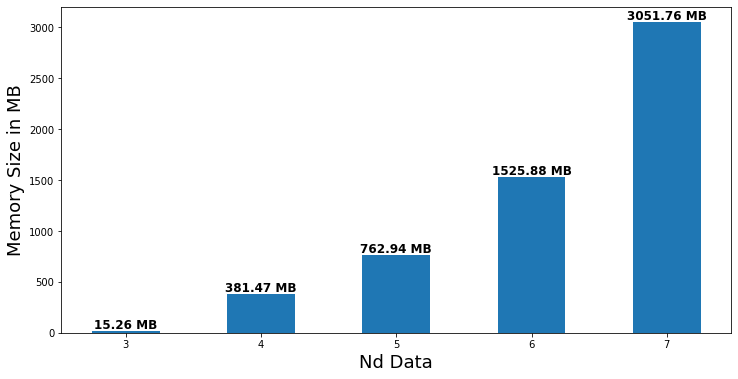

In [147]:
fig, ax = plt.subplots(figsize=(12,6))
bar = plt.bar(df["N-dims"], df["Memory Size(in MB)"], width = 0.5)
ax.bar_label(bar, fmt='%.2f MB', fontsize=12, weight = "bold")
ax.set_xlabel("Nd Data", fontsize=18)
ax.set_ylabel("Memory Size in MB", fontsize=18)
plt.show()

### Runtime of diff methods

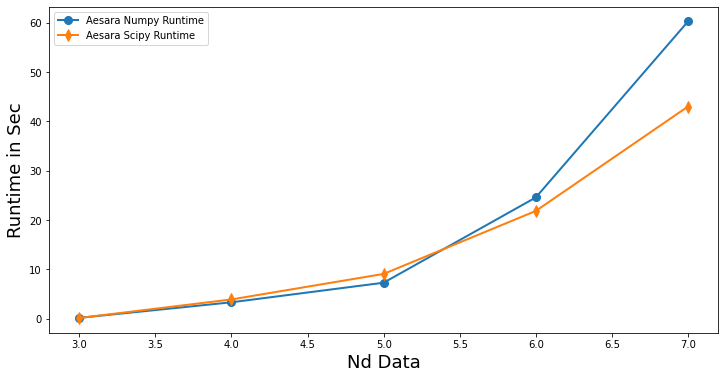

In [148]:
plt.figure(figsize=(12,6))

plt.plot(df["N-dims"], df["Aesara_Np_AvgTime"], lw = 2, marker = 'o', ms = 8, label = "Aesara Numpy Runtime")
plt.plot(df["N-dims"], df["Aesara_Sp_AvgTime"], lw = 2, marker = 'd', ms = 8, label = "Aesara Scipy Runtime")
plt.xlabel("Nd Data", fontsize=18)
plt.ylabel("Runtime in Sec", fontsize=18)
plt.legend()

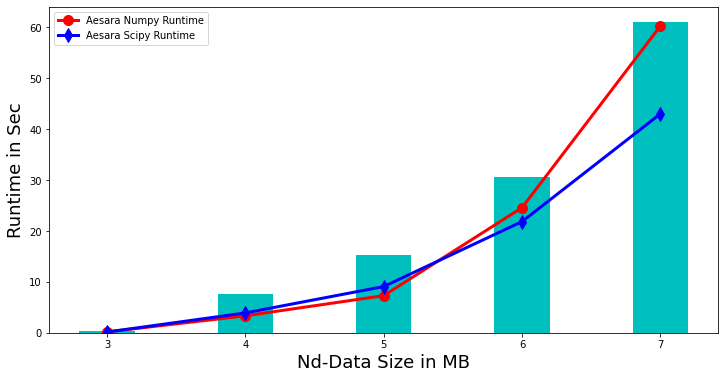

In [150]:
plt.figure(figsize=(12,6))

plt.bar(df["N-dims"], df["Memory Size(in MB)"]/50, width = 0.4, color='c') #/50 to reduce height of bargraph
plt.plot(df["N-dims"], df["Aesara_Np_AvgTime"], lw = 3, marker = 'o', ms = 10, label = "Aesara Numpy Runtime", color = 'r')
plt.plot(df["N-dims"], df["Aesara_Sp_AvgTime"], lw = 3, marker = 'd', ms = 10, label = "Aesara Scipy Runtime", color = 'b')

plt.xlabel("Nd-Data Size in MB", fontsize=18)
plt.ylabel("Runtime in Sec", fontsize=18)
plt.legend()